In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
ds = pd.read_csv('./Data/felicidad_corrupt.csv')

In [19]:
X = ds.drop(['country','score','rank'], axis = 1)
y = np.asarray(ds['score'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)


Un diccionario de estimadores, que contiene las instancias de cada estimador, de manera genérica y lista para modificar sus parámetros.

In [17]:
estimadores = {
    'SVR'    : SVR(gamma= 'auto', C=1.0, epsilon=0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER'  : HuberRegressor(epsilon=1.35, max_iter=10000)
}

SVR
Score 0.9977460435850166
MSE 0.00564242661202576


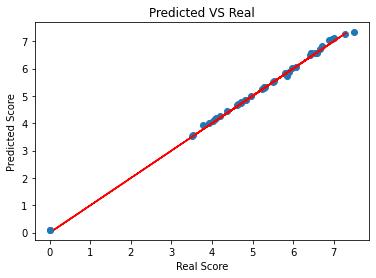

RANSAC
Score 1.0
MSE 1.2319833046257582e-19


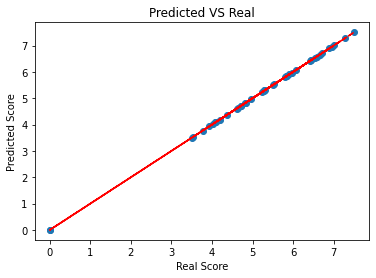

HUBER
Score 0.9999999998193447
MSE 4.522420460854316e-10


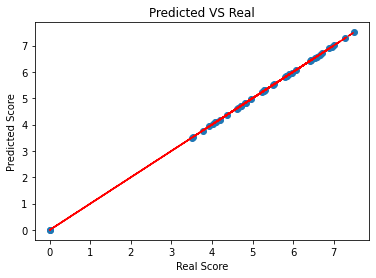

In [20]:
for name, estimator in estimadores.items():
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    print('='*32)
    print(name)
    print('Score', estimator.score(X_test, y_test))
    print('MSE', mean_squared_error(y_test, predictions))
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r--')
    plt.show()